In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
#loading the datset
df=pd.read_csv('/content/drive/MyDrive/Dataset/newborn weight/Common - Sheet1.csv')
df.head()

,Gravidity,BMI,Height (m),Weight (Kg),Age,Hemoglobin level,Unnamed: 6,Blood Suger,Unnamed: 8,Average-B.pressure,Unnamed: 10,Weight Measures,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Gender,Baby Weight (g),Baby Weight (g).1
0,NaN,NaN,NaN,NaN,NaN,First Measures,Second Measures,First Measures,Second Measures,High BP,Low BP,1-4 weeks(1),5-8 weeks (2),9-12 weeks (3),13-16 weeks (4),17-20 weeks (5),21-24 weeks (6),NaN,NaN,NaN
1,1st,25.9,1.61,67.14,27.0,12.30,10.40,102.00,71.00,98.33,60.00,67.13,64.90,63.90,63.50,65.50,68.50,Girl,B,2800.0
2,1st,19.0,1.58,47.43,17.0,12.00,12.00,84.00,101.00,105.00,66.67,47.00,48.50,47.00,48.00,52.00,55.40,boy,B,2870.0
3,1st,26.0,1.49,57.72,22.0,12.00,12.00,99.00,78.00,115.00,68.33,57.70,58.00,56.50,57.00,58.00,61.50,girl,C,2780.0
4,1st,21.8,1.58,54.42,25.0,12.00,10.90,85.00,61.00,116.67,60.00,54.50,54.50,55.80,57.80,58.00,60.00,girl,A,3660.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gravidity           336 non-null    object 
 1   BMI                 336 non-null    float64
 2   Height (m)          336 non-null    float64
 3   Weight (Kg)         336 non-null    float64
 4   Age                 336 non-null    float64
 5   Hemoglobin level    337 non-null    object 
 6   Unnamed: 6          337 non-null    object 
 7   Blood Suger         336 non-null    object 
 8   Unnamed: 8          335 non-null    object 
 9   Average-B.pressure  337 non-null    object 
 10  Unnamed: 10         337 non-null    object 
 11  Weight Measures     337 non-null    object 
 12  Unnamed: 12         337 non-null    object 
 13  Unnamed: 13         337 non-null    object 
 14  Unnamed: 14         337 non-null    object 
 15  Unnamed: 15         337 non-null    object 
 16  Unnamed:

In [4]:
# Specify the columns you want to convert to numeric
columns_to_convert = [ 'Unnamed: 8', 'Average-B.pressure', 'Unnamed: 10', 'Weight Measures',
                      'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [5]:
df["Hemoglobin level"] = pd.to_numeric(df["Hemoglobin level"], errors="coerce")
df["Unnamed: 6"] = pd.to_numeric(df["Unnamed: 6"], errors="coerce")
average1 = (df["Hemoglobin level"] + df["Unnamed: 6"]) / 2

# Create a new column in the DataFrame for the average
df["Hemoglobin level"] = average1

df["Blood Suger"] = pd.to_numeric(df["Unnamed: 8"], errors="coerce")
df["Blood Suger"] = pd.to_numeric(df["Unnamed: 8"], errors="coerce")
average2 = (df["Blood Suger"] + df["Unnamed: 8"]) / 2

# Create a new column in the DataFrame for the average
df["Blood Suger"] = average2
average3 = (df["Average-B.pressure"] + df["Unnamed: 10"]) / 2

# Drop the original columns if needed
df.drop(columns=['Unnamed: 6','Unnamed: 8','Unnamed: 10'], inplace=True)


new_column_names = {
    'Weight Measures': 'Weight Measures-1-4 weeks(1)',
    'Unnamed: 12': 'Weight Measures-5-8 weeks (2)',
    'Unnamed: 13': 'Weight Measures-9-12 weeks (3)',
    'Unnamed: 14': 'Weight Measures-13-16 weeks (4)',
    'Unnamed: 15': 'Weight Measures-17-20 weeks (5)',
    'Unnamed: 16': 'Weight Measures-21-24 weeks (6)'
}
# Drop the first row
df.drop(0, axis=0, inplace=True)

# Rename the columns
df.rename(columns=new_column_names, inplace=True)




df

,Gravidity,BMI,Height (m),Weight (Kg),Age,Hemoglobin level,Blood Suger,Average-B.pressure,Weight Measures-1-4 weeks(1),Weight Measures-5-8 weeks (2),Weight Measures-9-12 weeks (3),Weight Measures-13-16 weeks (4),Weight Measures-17-20 weeks (5),Weight Measures-21-24 weeks (6),Gender,Baby Weight (g),Baby Weight (g).1
1,1st,25.9,1.61,67.14,27.0,11.35,71.0,98.33,67.13,64.9,63.9,63.5,65.5,68.5,Girl,B,2800.0
2,1st,19.0,1.58,47.43,17.0,12.00,101.0,105.00,47.00,48.5,47.0,48.0,52.0,55.4,boy,B,2870.0
3,1st,26.0,1.49,57.72,22.0,12.00,78.0,115.00,57.70,58.0,56.5,57.0,58.0,61.5,girl,C,2780.0
4,1st,21.8,1.58,54.42,25.0,11.45,61.0,116.67,54.50,54.5,55.8,57.8,58.0,60.0,girl,A,3660.0
5,1st,17.6,1.56,42.83,26.0,11.05,87.4,100.00,43.00,43.0,44.0,46.0,47.0,51.0,boy,B,3190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,5th,26.5,1.62,69.55,30.0,10.30,92.0,110.00,69.50,69.7,70.5,71.0,71.5,72.0,boy,A,3295.0
333,3rd,25.1,1.47,54.24,41.0,10.20,80.0,100.00,54.20,52.8,53.0,55.0,55.5,56.5,boy,B,3170.0
334,5th,22.0,1.42,44.36,33.0,9.80,71.0,105.00,44.30,44.0,42.0,40.0,42.0,42.5,girl,B,2870.0
335,2nd,23.0,1.61,59.62,25.0,13.40,94.0,106.67,59.60,60.0,59.0,61.0,62.5,64.5,boy,B,2900.0


In [6]:

en = LabelEncoder()
cat_cols = ['Gravidity', 'Gender', 'Baby Weight (g)']

for col in cat_cols:
    df[col] = en.fit_transform(df[col])

df['Blood Suger'] = df['Blood Suger'].fillna(df['Blood Suger'].median())
df

,Gravidity,BMI,Height (m),Weight (Kg),Age,Hemoglobin level,Blood Suger,Average-B.pressure,Weight Measures-1-4 weeks(1),Weight Measures-5-8 weeks (2),Weight Measures-9-12 weeks (3),Weight Measures-13-16 weeks (4),Weight Measures-17-20 weeks (5),Weight Measures-21-24 weeks (6),Gender,Baby Weight (g),Baby Weight (g).1
1,0,25.9,1.61,67.14,27.0,11.35,71.0,98.33,67.13,64.9,63.9,63.5,65.5,68.5,0,1,2800.0
2,0,19.0,1.58,47.43,17.0,12.00,101.0,105.00,47.00,48.5,47.0,48.0,52.0,55.4,1,1,2870.0
3,0,26.0,1.49,57.72,22.0,12.00,78.0,115.00,57.70,58.0,56.5,57.0,58.0,61.5,2,2,2780.0
4,0,21.8,1.58,54.42,25.0,11.45,61.0,116.67,54.50,54.5,55.8,57.8,58.0,60.0,2,0,3660.0
5,0,17.6,1.56,42.83,26.0,11.05,87.4,100.00,43.00,43.0,44.0,46.0,47.0,51.0,1,1,3190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,4,26.5,1.62,69.55,30.0,10.30,92.0,110.00,69.50,69.7,70.5,71.0,71.5,72.0,1,0,3295.0
333,2,25.1,1.47,54.24,41.0,10.20,80.0,100.00,54.20,52.8,53.0,55.0,55.5,56.5,1,1,3170.0
334,4,22.0,1.42,44.36,33.0,9.80,71.0,105.00,44.30,44.0,42.0,40.0,42.0,42.5,2,1,2870.0
335,1,23.0,1.61,59.62,25.0,13.40,94.0,106.67,59.60,60.0,59.0,61.0,62.5,64.5,1,1,2900.0


## **EDA**

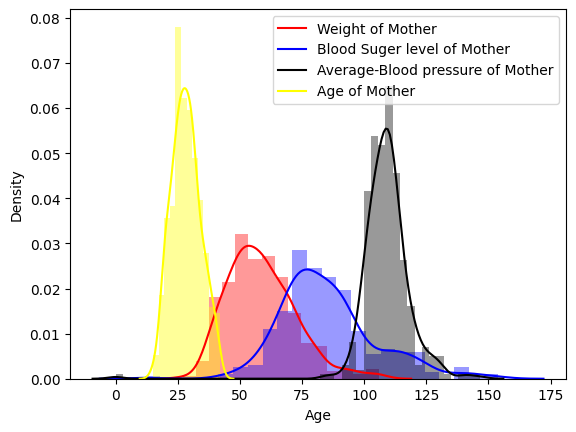

In [7]:
from scipy.stats import skew, norm

ax = sns.distplot(df['Weight (Kg)'], color = 'red')
ax = sns.distplot(df['Blood Suger'], color = 'blue')
ax = sns.distplot(df['Average-B.pressure'], color = 'black')
ax = sns.distplot(df['Age'], color = 'yellow')

plt.legend(['Weight of Mother','Blood Suger level of Mother','Average-Blood pressure of Mother','Age of Mother'])

<Axes: xlabel='Age', ylabel='BMI'>

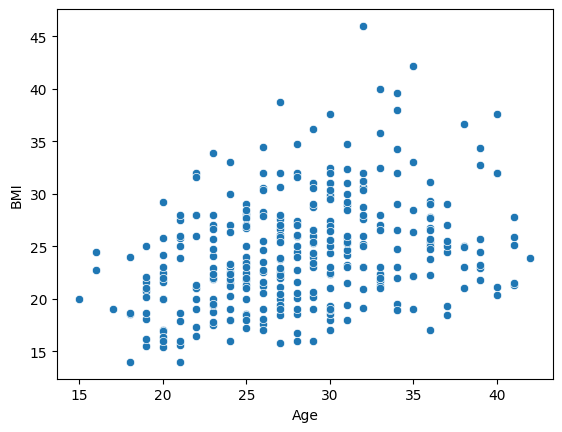

In [8]:
sns.scatterplot(data = df, x = 'Age',y ='BMI')

<Axes: xlabel='Baby Weight (g).1', ylabel='Density'>

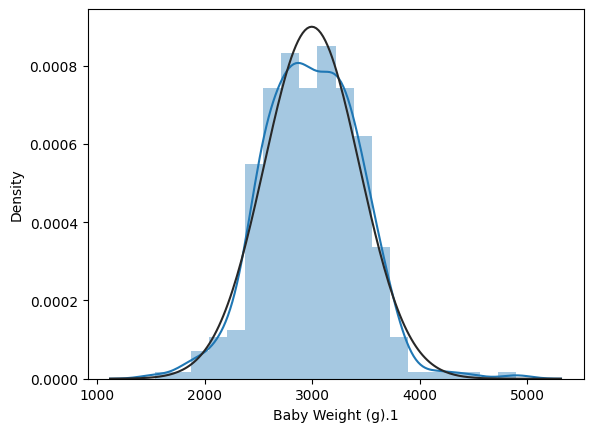

In [9]:
sns.distplot(df["Baby Weight (g).1"], fit = norm)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['Baby Weight (g)'], axis=1)
y = df['Baby Weight (g)']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Define the models for classification
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost Classifier': XGBClassifier()
}

# Define hyperparameters for each model
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN Classifier': {'n_neighbors': [3, 5, 7]},
    'Random Forest Classifier': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Gradient Boosting Classifier': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
    'XGBoost Classifier': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Initialize an empty dictionary to store the best models
best_models = {}

# Define the number of folds for cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"Performing GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=kf, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate the best models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy}")
    print("Classification Report:")
    print(report)

Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Logistic Regression: {'C': 10}
Performing GridSearchCV for KNN Classifier...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for KNN Classifier: {'n_neighbors': 5}
Performing GridSearchCV for Random Forest Classifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Random Forest Classifier: {'max_depth': 20, 'n_estimators': 300}
Performing GridSearchCV for Gradient Boosting Classifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.01, 'n_estimators': 100}
Performing GridSearchCV for XGBoost Classifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for XGBoost Classifier: {'learning_rate': 0.01, 'n_estimators': 100}
Logistic Regression: Accuracy = 0.9642857142857143
Classification 

In [18]:
# Best model selection
best_model_name = None
best_accuracy = 0.0
for name, model in best_models.items():
    if name in ['Gradient Boosting Classifier', 'XGBoost Classifier']:
        accuracy = accuracy_score(y_test, model.predict(X_test))
        if accuracy > best_accuracy:
            best_model_name = name
            best_accuracy = accuracy

# Make predictions using the best model
if best_model_name is not None:
    best_model = best_models[best_model_name]
    y_pred = best_model.predict(X_test)
    print(f"Best model: {best_model_name}")
    print("Predictions:")
    print(y_pred)
else:
    print("No best model found.")


Best model: Gradient Boosting Classifier
Predictions:
[1 1 1 1 1 2 1 1 2 2 0 1 1 1 2 2 2 1 1 2 2 2 2 0 1 2 1 1 1 1 0 0 2 2 1 1 0
 1 1 0 0 0 2 0 0 0 0 2 0 2 1 2 1 1 2 1 0 2 2 0 1 2 0 2 1 2 0 1 1 2 2 2 1 1
 0 2 0 1 0 2 1 2 2 2]


Based on the classification accuracy and the classification reports, both Gradient Boosting Classifier and XGBoost Classifier achieved perfect accuracy (1.0) on the test set. Therefore, you can consider either of them as the best model for this particular dataset.

In [16]:
# Example new data
example_new_data = [
    [25.9, 1.61, 67.14, 27.0, 11.35, 71.0, 98.33, 67.13, 64.9, 63.9, 63.5, 65.5, 68.5, 0, 1, 2800.0]  # Example data point 1
]

# Convert the example new data into a NumPy array
example_new_data_array = np.array(example_new_data)

# Use the best model (Gradient Boosting Classifier) for making predictions
best_model = best_models['Gradient Boosting Classifier']

# Predict classes for the example new data
example_new_data_predictions = best_model.predict(example_new_data_array)

# Display the predictions
print("Predictions for the example new data:")
print(example_new_data_predictions)

Predictions for the example new data:
[0]
